# Quick Start Guide

In [11]:
import matplotlib.pyplot as plt
import numpy as np

### A Simple Example

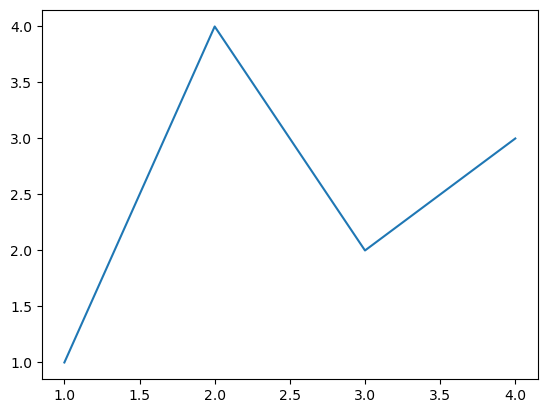

In [12]:
fig, ax = plt.subplots() # Create a figure containing a single Axe

ax.plot([1,2,3,4], [1,4,2,3]) # Plot some data on the Axes
plt.show() # Show the figure

### Parts of a Figure

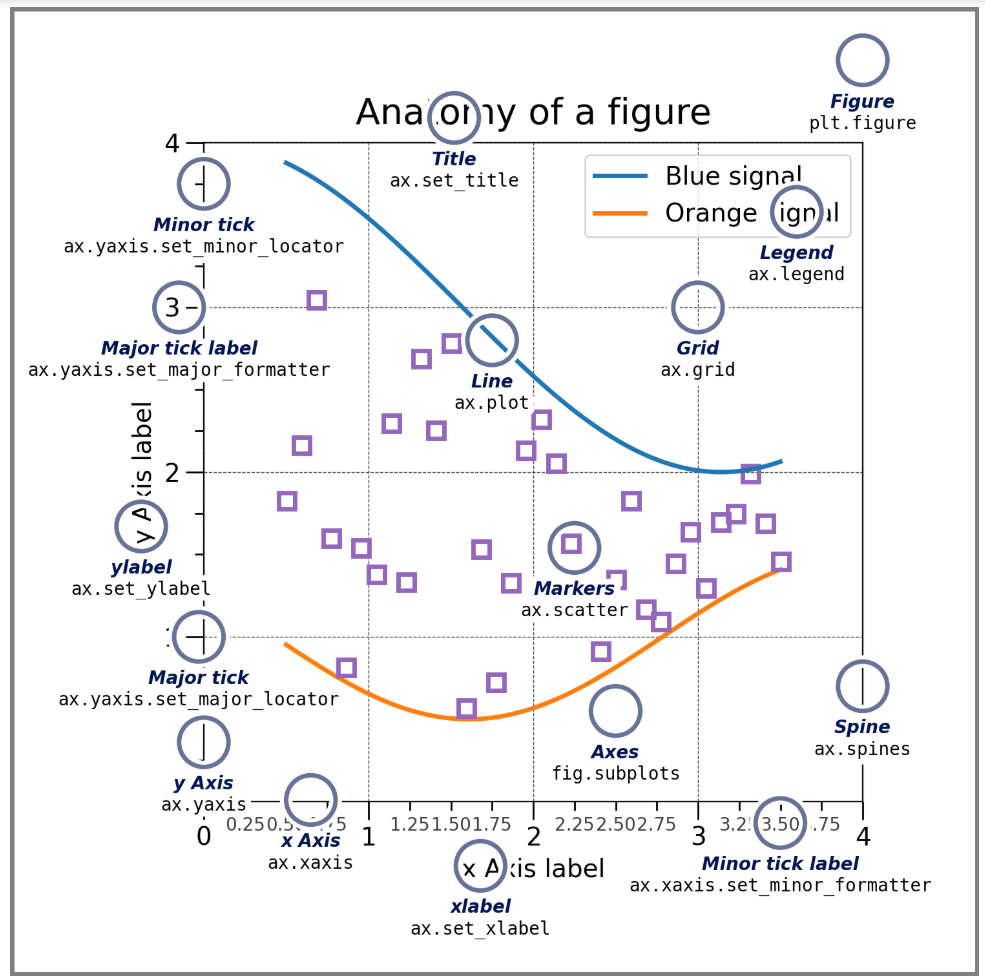

### Figure 
The **whole** figure. The figure keeps track of all the child **Axes**, a group of `special` Artists (titles, figure, legends, colorbars, etc.), and even nested subfigures  

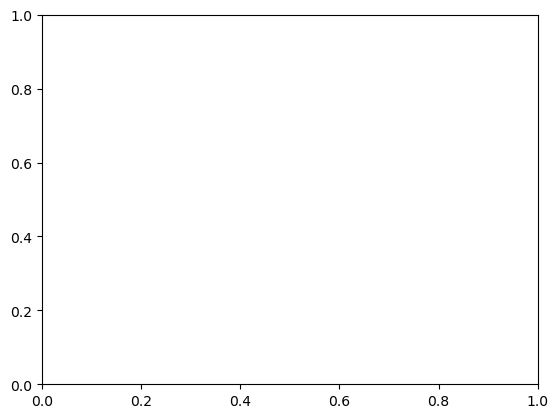

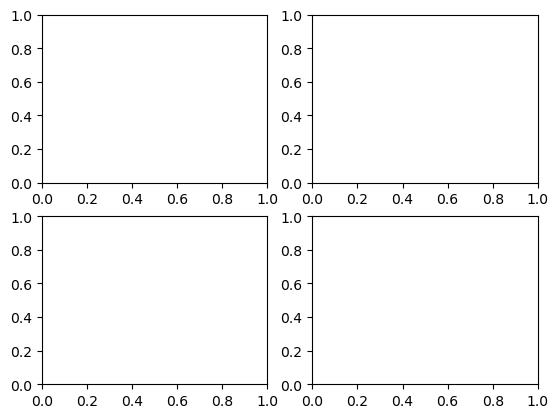

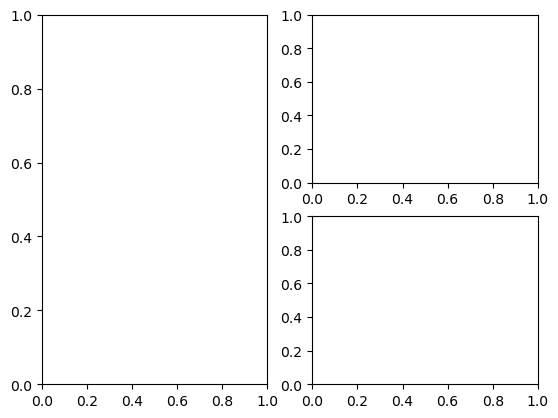

In [13]:
fig, ax = plt.subplots() # an empty figure with a single Axes
fig, ax = plt.subplots(2,2) # a figure with a 2 x 2 grid of axes

# a figure with one Axes on the left, and two on the right
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                                ['left', 'right_bottom']])

### Axes
An Axes is an Artist attached to a Figure that contains a region for plotting data and usually includes two (or three in the case of 3D) Aixis objects  

### Axis 
These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labelin gthe ticks)  

### Artist
BAsically, everything visible on the Figure is an Artist (even `Figure`, `Axes`, and `Axis` objects)  

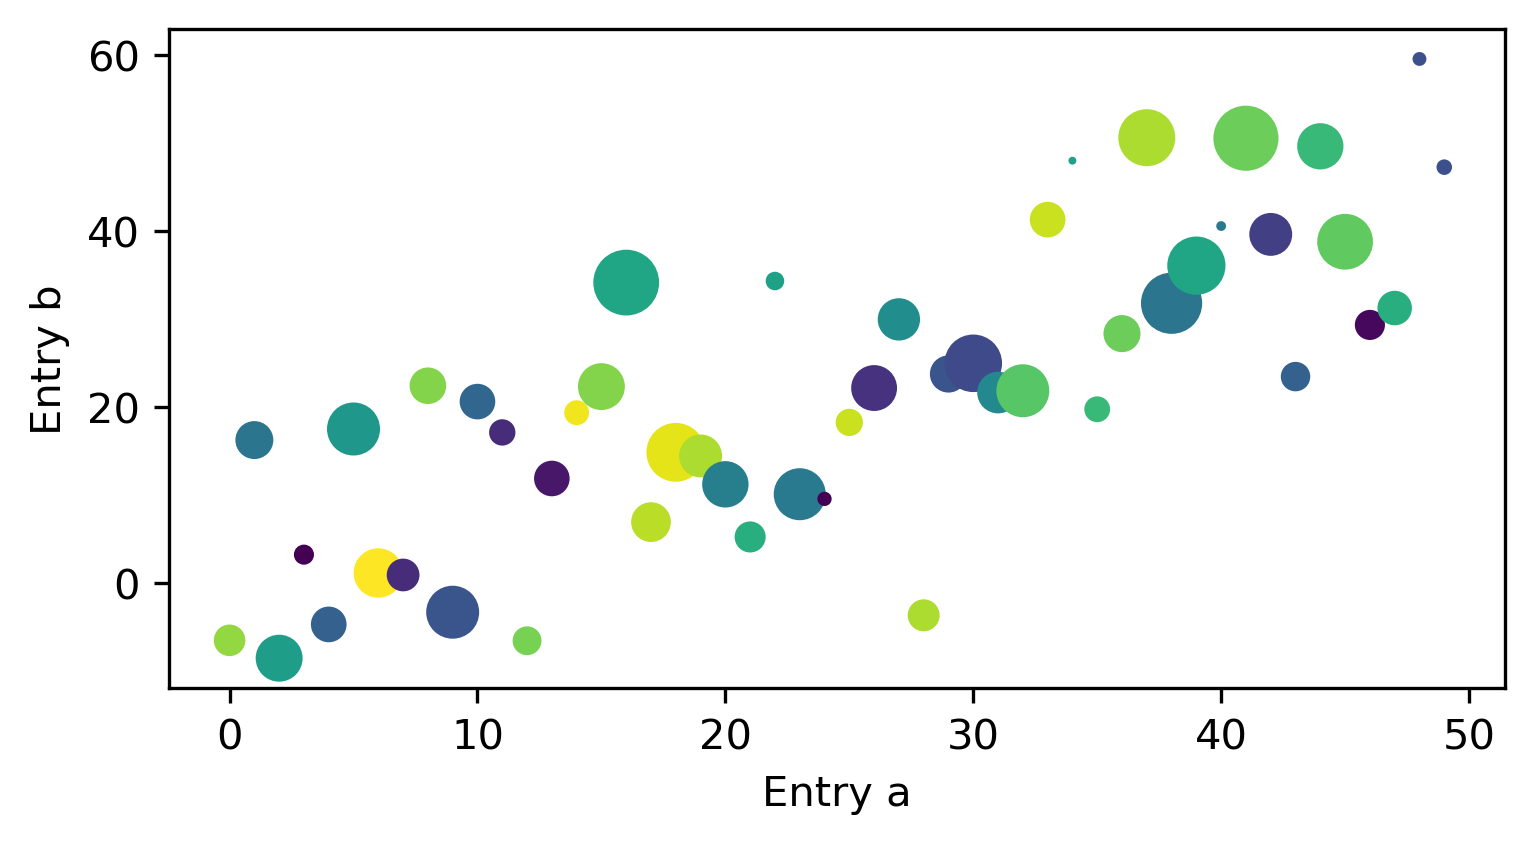

In [14]:
np.random.seed(19680802) # seed the random number generator

data = {'a': np.arange(50),'c':np.random.randint(0,50, 50), 'd':np.random.randn(50)}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d'] * 100)

fig, ax = plt.subplots(figsize = (5,2.7), dpi = 300, layout = 'constrained')

ax.scatter('a', 'b', c = 'c', s = 'd', data = data)
ax.set_xlabel("Entry a")
ax.set_ylabel("Entry b")

plt.show()

### Coding Styles

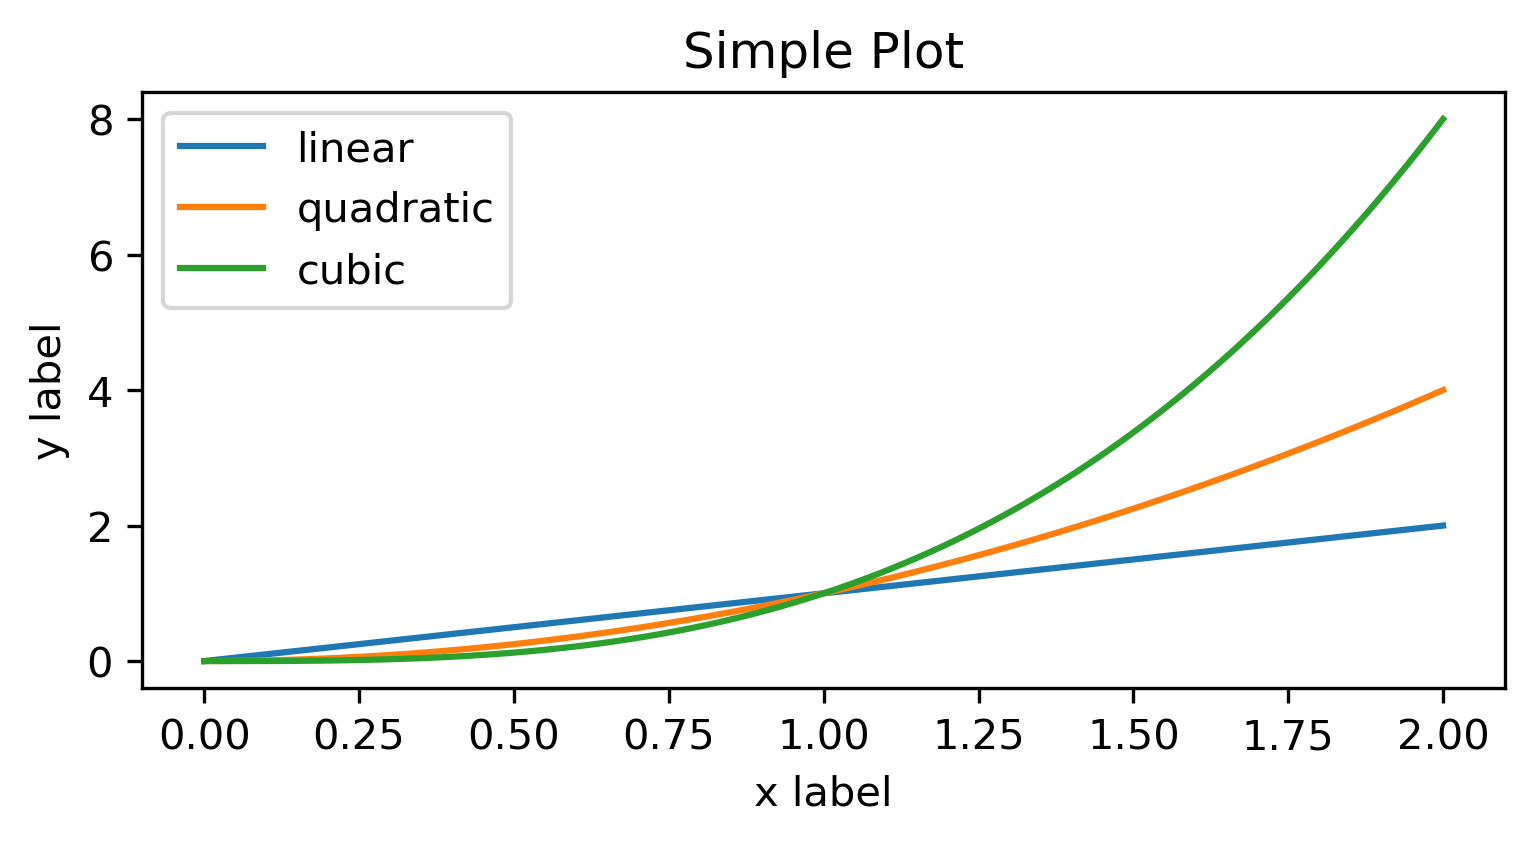

In [15]:
x = np.linspace(0, 2, 100) # Sample data 

fig, ax = plt.subplots(figsize = (5, 2.7), dpi = 300, layout = 'constrained')
ax.plot(x, x, label = 'linear') # Plot some data on the Axes
ax.plot(x, x**2, label = 'quadratic')
ax.plot(x, x**3, label = 'cubic')

ax.set_title("Simple Plot")
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.legend()

plt.show()

### Making a Helper Functions
If you need to make the same plots over and over again with different datasets, or want to easily wrap Matplotlib methods, use the recommended signature function below  

In [16]:
def my_plotter(ax, data1, data2, param_dict):
               """
               A helper function to make a graph
               """
               out = ax.plot(data1, data2, **param_dict)

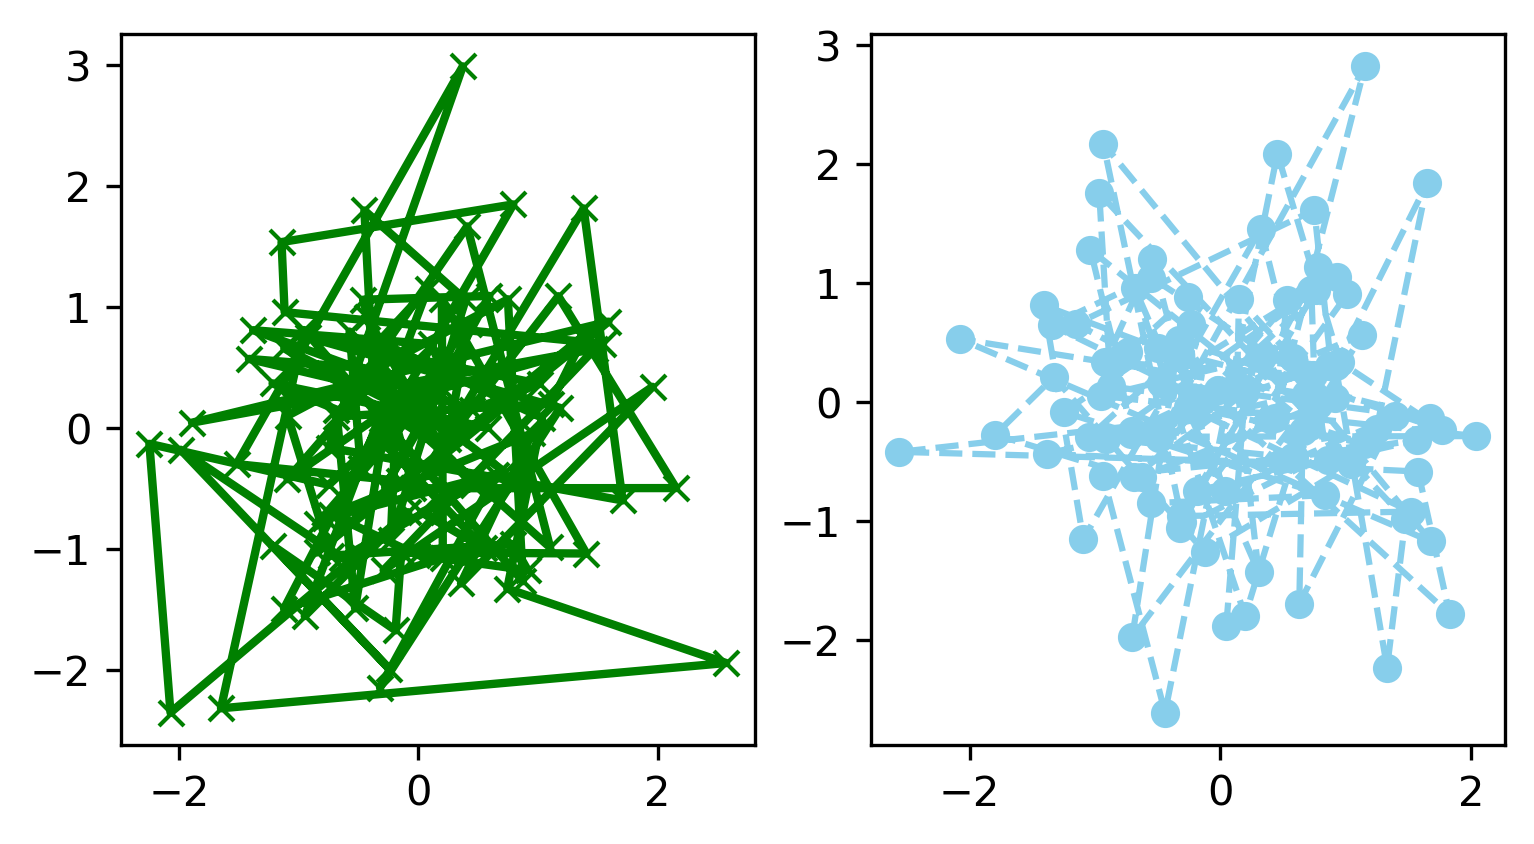

In [17]:
data1, data2, data3, data4 = np.random.randn(4,100)

fig, ax = plt.subplots(1,2,figsize = (5, 2.7), dpi = 300, layout = 'constrained')

my_plotter(ax[0], data1, data2, {'color' : 'green', 'linewidth' : 2, 'linestyle' : '-','marker':'x'})
my_plotter(ax[1], data3, data4, {'color' : 'skyblue', 'linestyle' : '--','marker':'o'})


### Styling Artists
Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist

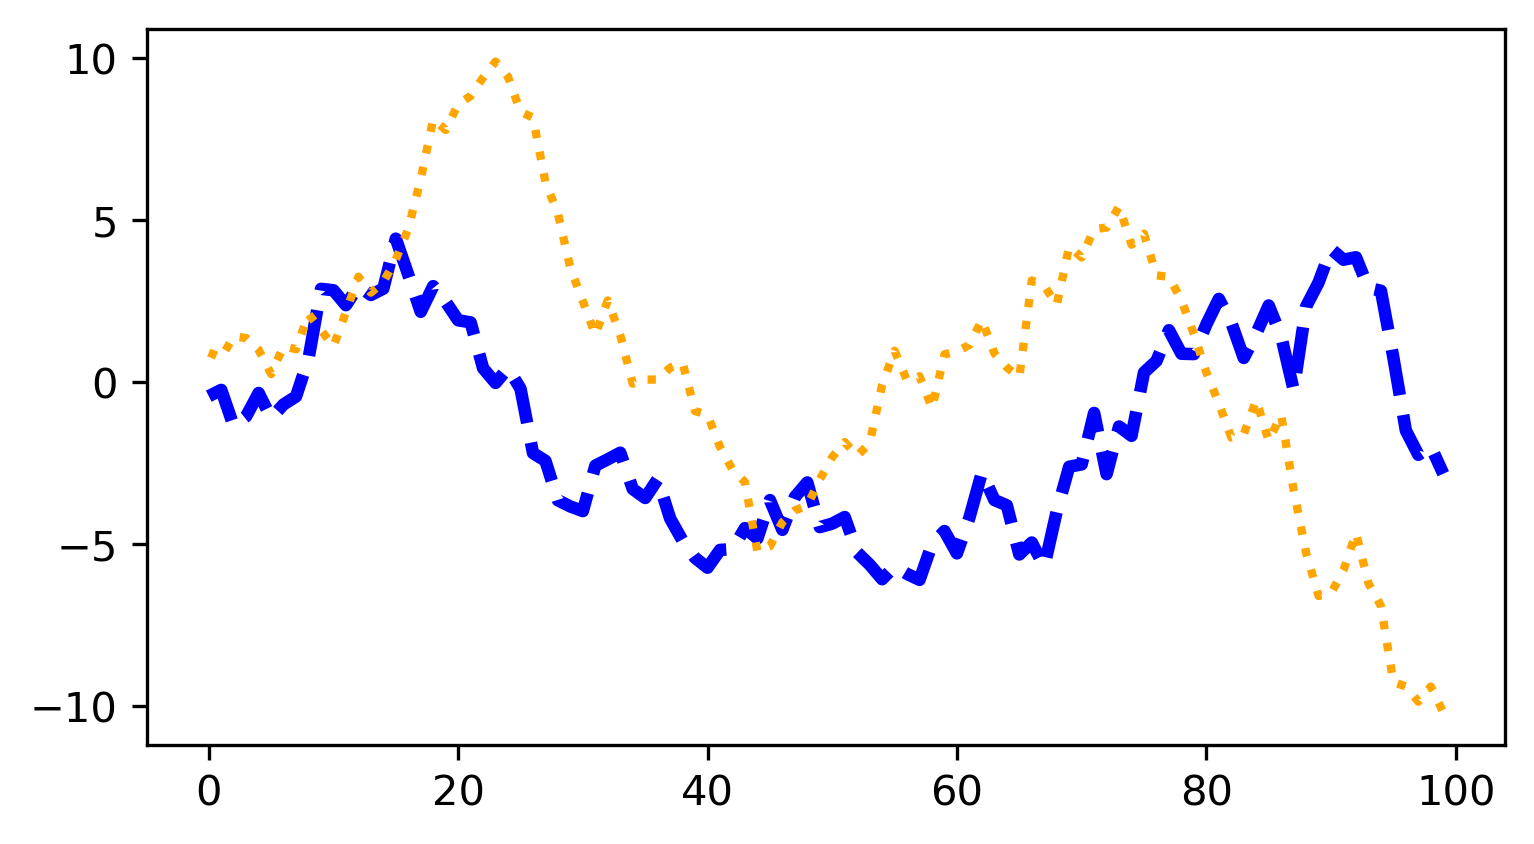

In [18]:
fig, ax = plt.subplots(figsize = (5, 2.7), dpi = 300, layout = 'constrained')

x = np.arange(len(data1))

ax.plot(x, np.cumsum(data1), color = 'blue', linewidth = 3, linestyle = '--')

l, = ax.plot(x, np.cumsum(data2), color = 'orange', linewidth = 2)
l.set_linestyle(':')

plt.show()

### Colors
Matplotlib has a very flexible array of colors that are accepted for most Artists

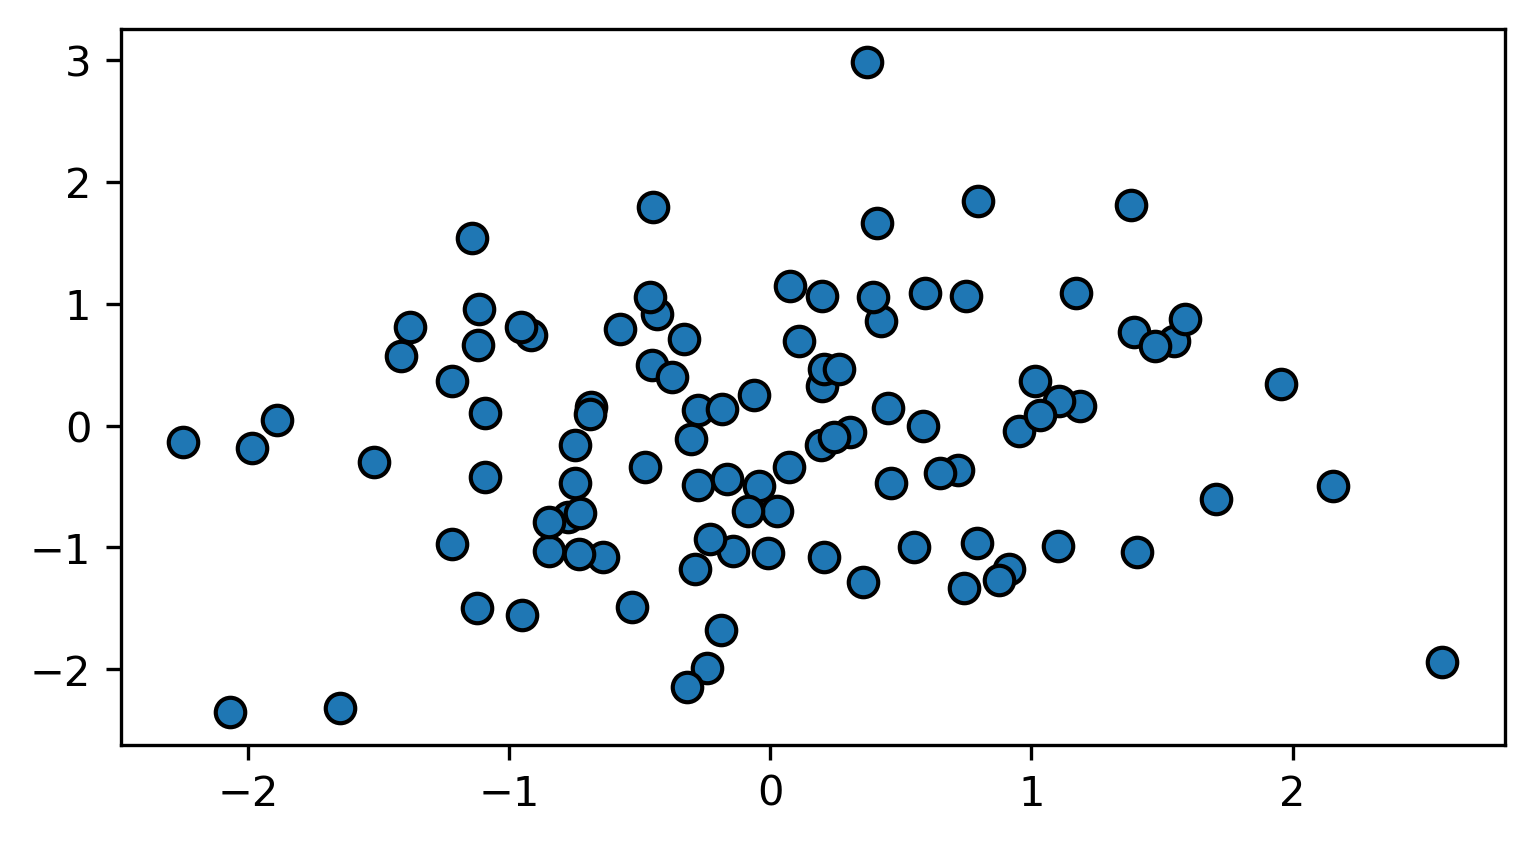

In [19]:
fig, ax = plt.subplots(figsize = (5, 2.7), dpi = 300, layout = 'constrained')
ax.scatter(data1, data2, s = 50, facecolor = 'C0', edgecolor = 'k')

plt.show()

### Linewidths, linestyles, and markersizes

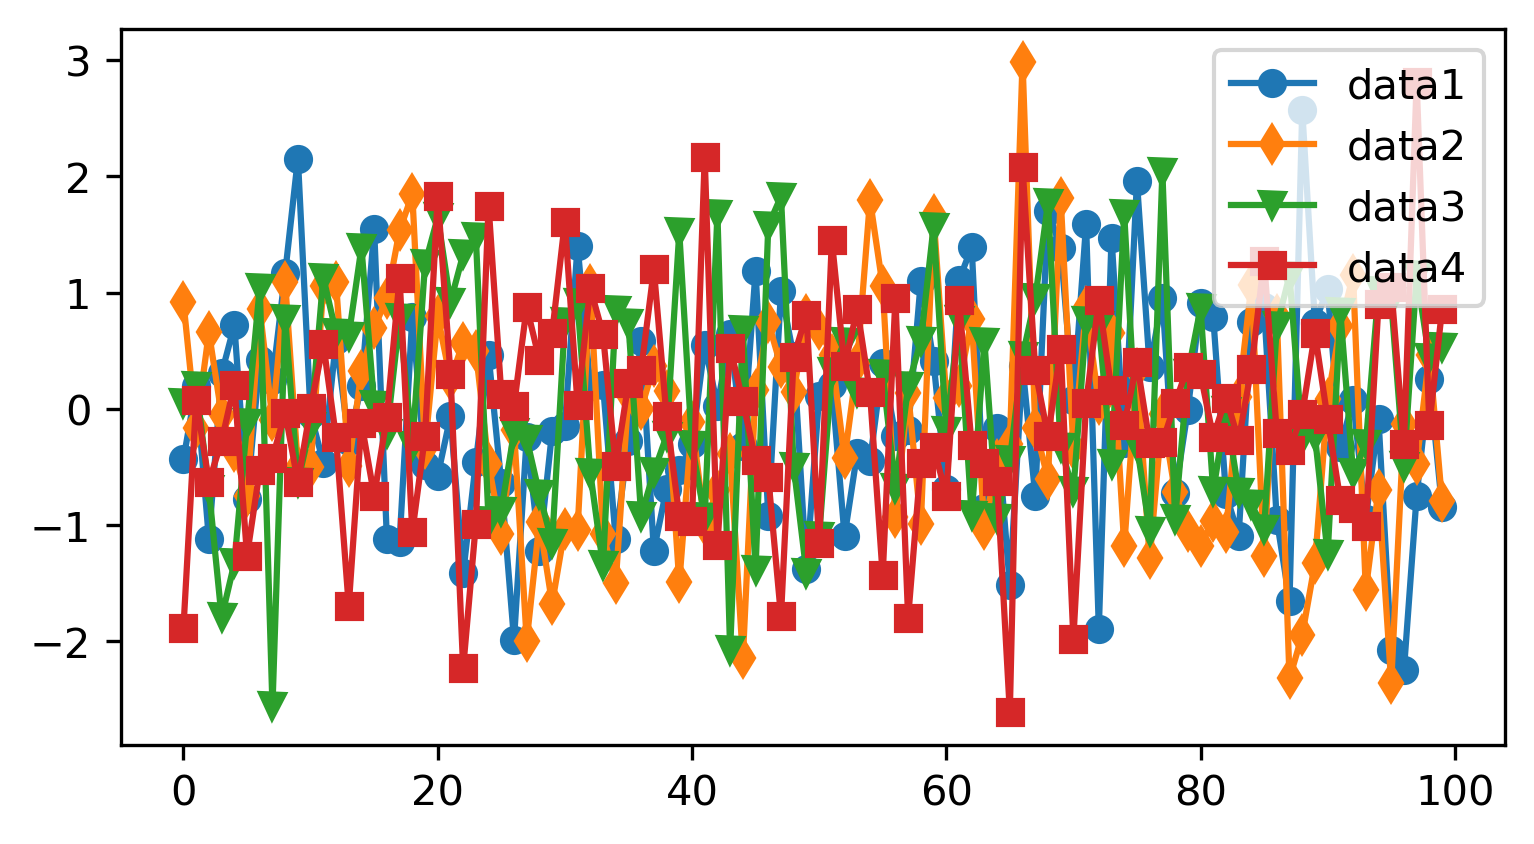

In [20]:
fig, ax = plt.subplots(figsize = (5, 2.7), dpi = 300, layout = 'constrained')

ax.plot(data1, marker = 'o', label = 'data1')
ax.plot(data2, marker = 'd', label = 'data2')
ax.plot(data3, marker = 'v', label = 'data3')
ax.plot(data4, marker = 's', label = 'data4')

ax.legend()

plt.show()

### Labelling Plots
Axes labels and teext

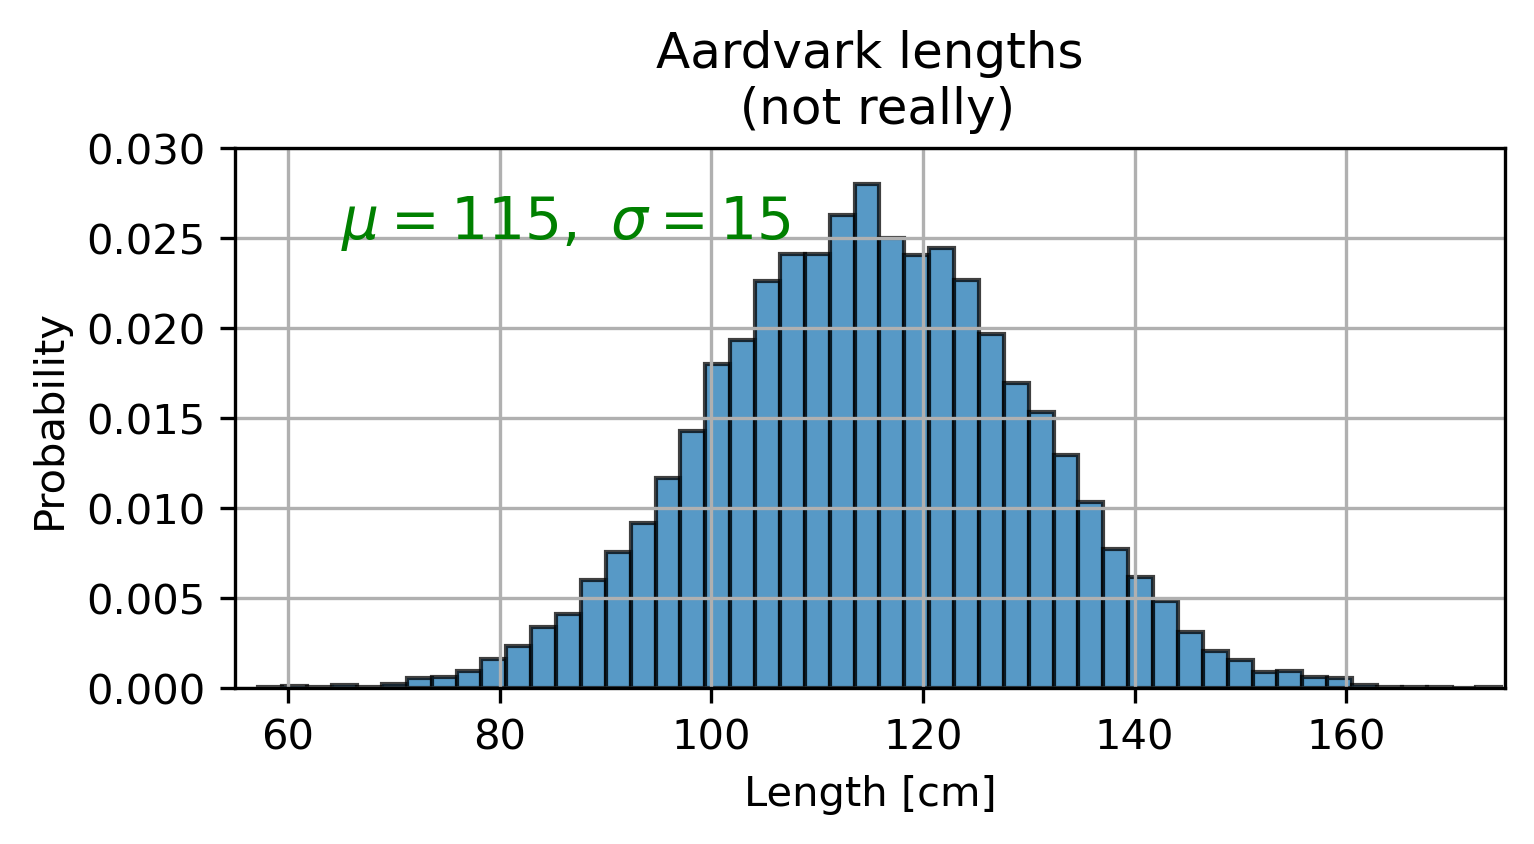

In [21]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)

fig, ax = plt.subplots(figsize = (5, 2.7), dpi = 300, layout = 'constrained')

# the histogram of the data
n, bins, patches = ax.hist(x, bins = 50, density = True, facecolor = 'C0', alpha = 0.75, edgecolor = 'black')

# We can set text related properties in the text - title, label, etc.
ax.set_title("Aardvark lengths\n (not really)")
ax.set_xlabel("Length [cm]")
ax.set_ylabel("Probability")

ax.text(65,.025, r'$\mu = 115,\ \sigma=15$', fontsize = 14, color = 'green') # text for the axis (x_possition, y_position, string)
ax.axis([55,175,0,0.03])  # X and Y axis limits (x_lower, x_upper, y_lower, y_upper)
ax.grid(True)

plt.show()

### Annotations
We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext

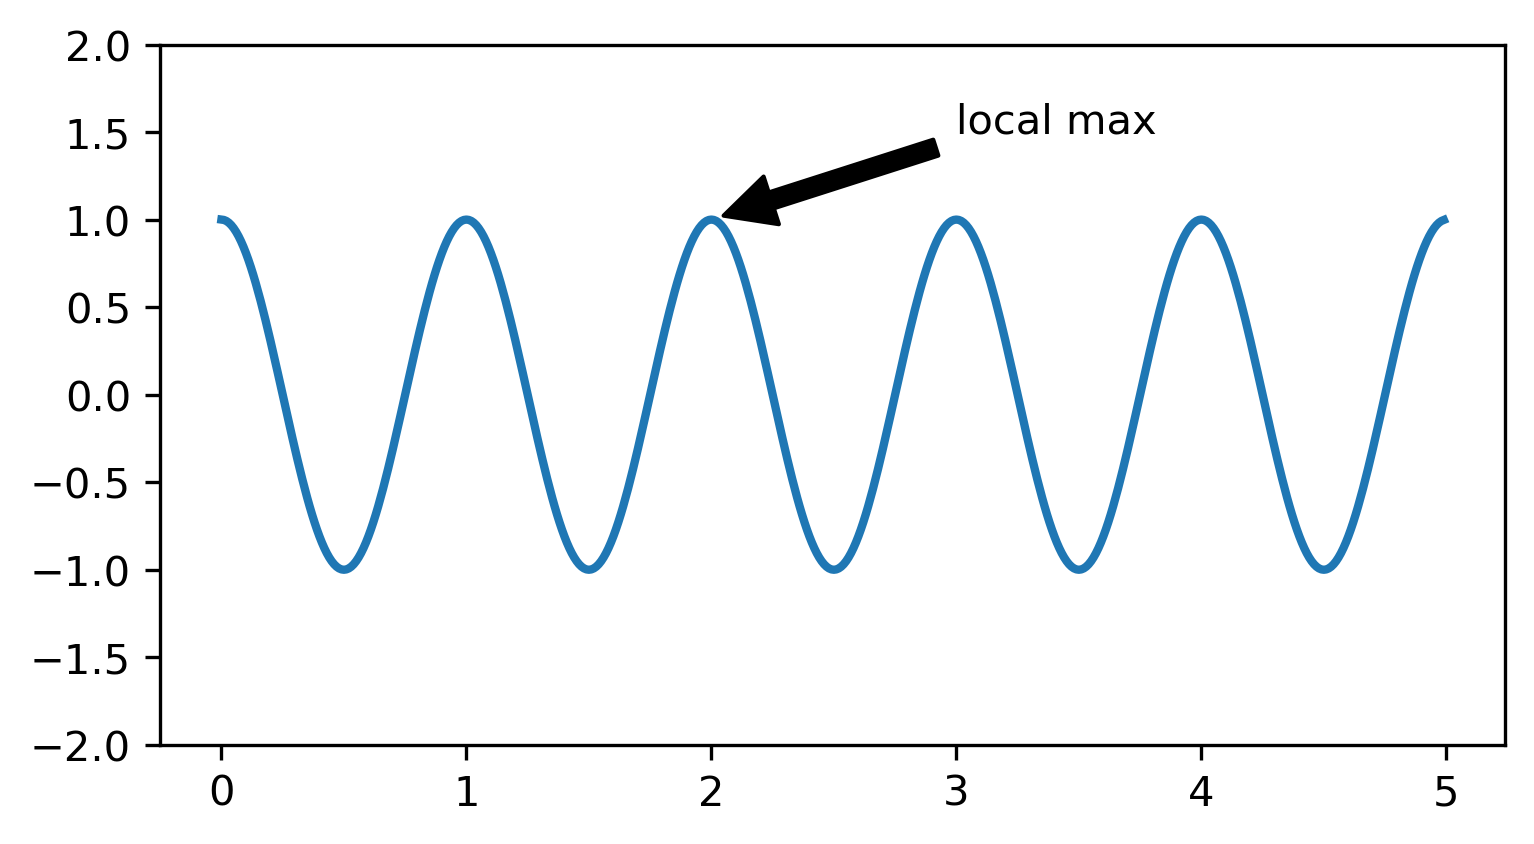

In [22]:
fig, ax =plt.subplots(figsize = (5, 2.7), dpi = 300, layout = 'constrained')

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi * t)

ax.plot(t, s, lw = 2)
ax.annotate('local max', xy = (2,1), xytext = (3, 1.5), arrowprops = dict(facecolor = 'black', shrink = 0.05))


ax.set_ylim(-2,2) # Show data from -2, to 2

plt.show()

### Scales
In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale

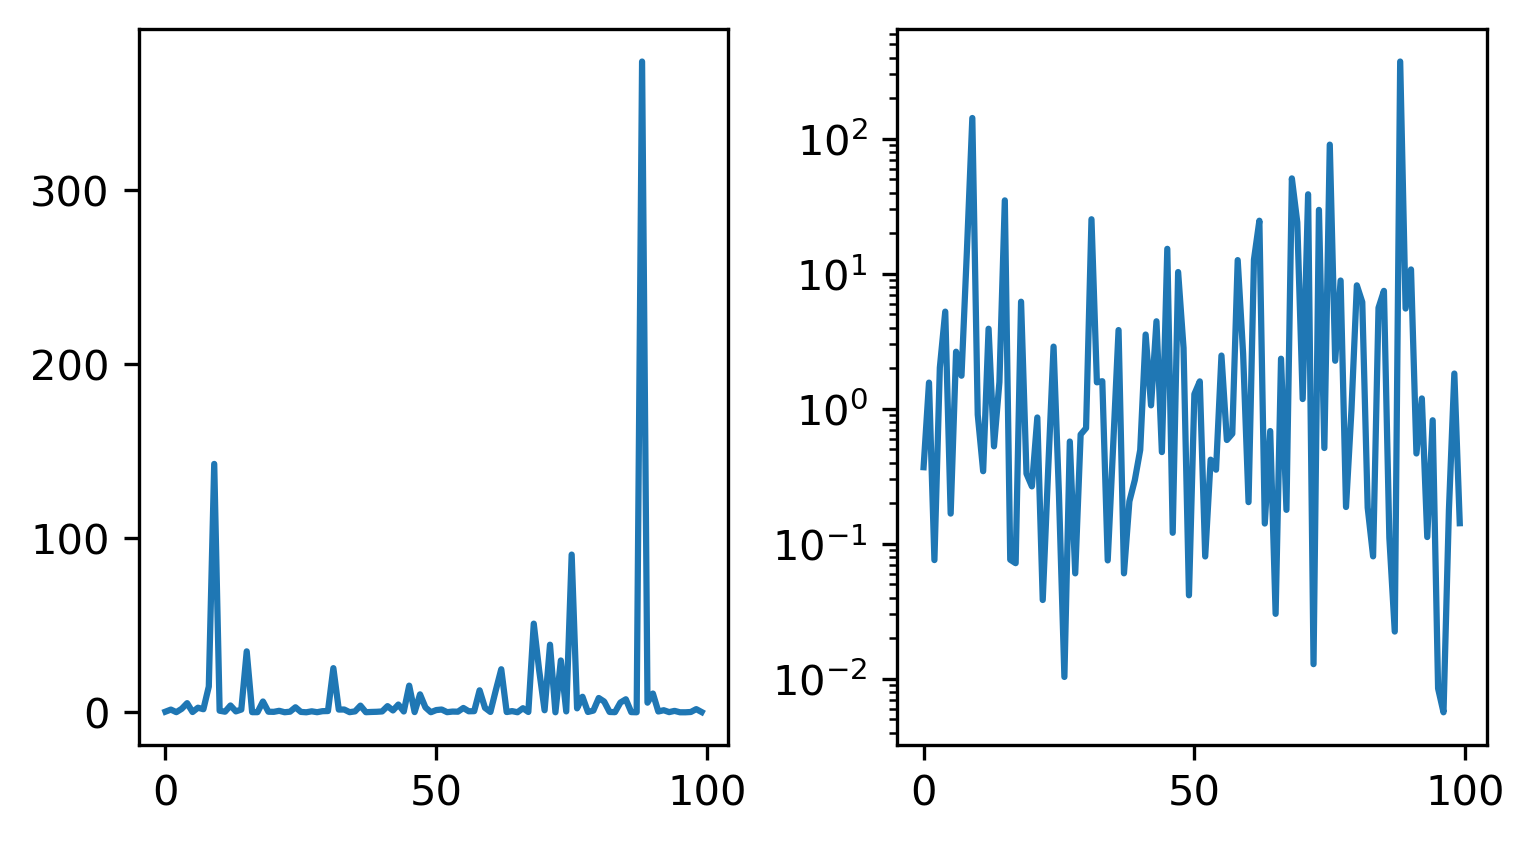

In [23]:
fig, ax = plt.subplots(1,2, figsize = (5, 2.7), layout = 'constrained', dpi = 300)

xdata = np.arange(len(data1))
data = 10**data1

ax[0].plot(xdata, data)

ax[1].plot(xdata, data)
ax[1].set_yscale('log')

plt.show()

### Tick locators and formatters 
Each Axis has a tick locator and formatter that choose where alnog the Axis objects to put tick marks

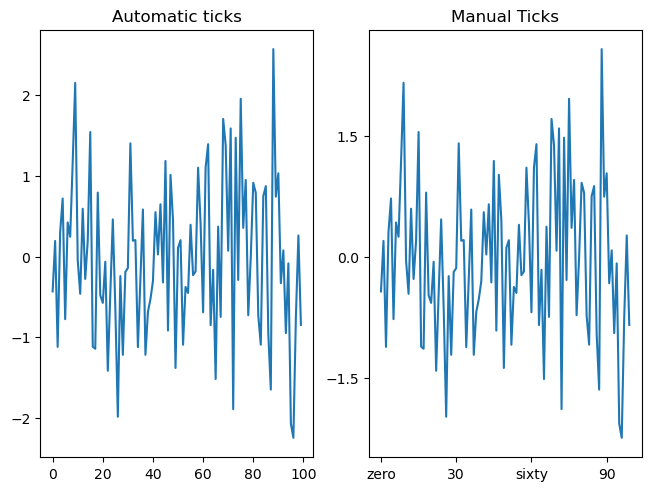

In [27]:
fig, ax = plt.subplots(1,2, layout = 'constrained')

ax[0].plot(xdata, data1)
ax[0].set_title('Automatic ticks')


ax[1].plot(xdata, data1)
ax[1].set_xticks(np.arange(0,100,30), ['zero', '30', 'sixty', '90'])
ax[1].set_yticks([-1.5,0,1.5])
ax[1].set_title('Manual Ticks')

plt.show()

### Exploring Diiferent Types of Plots

### Bar Plots
Useful for comparing different categories or groups

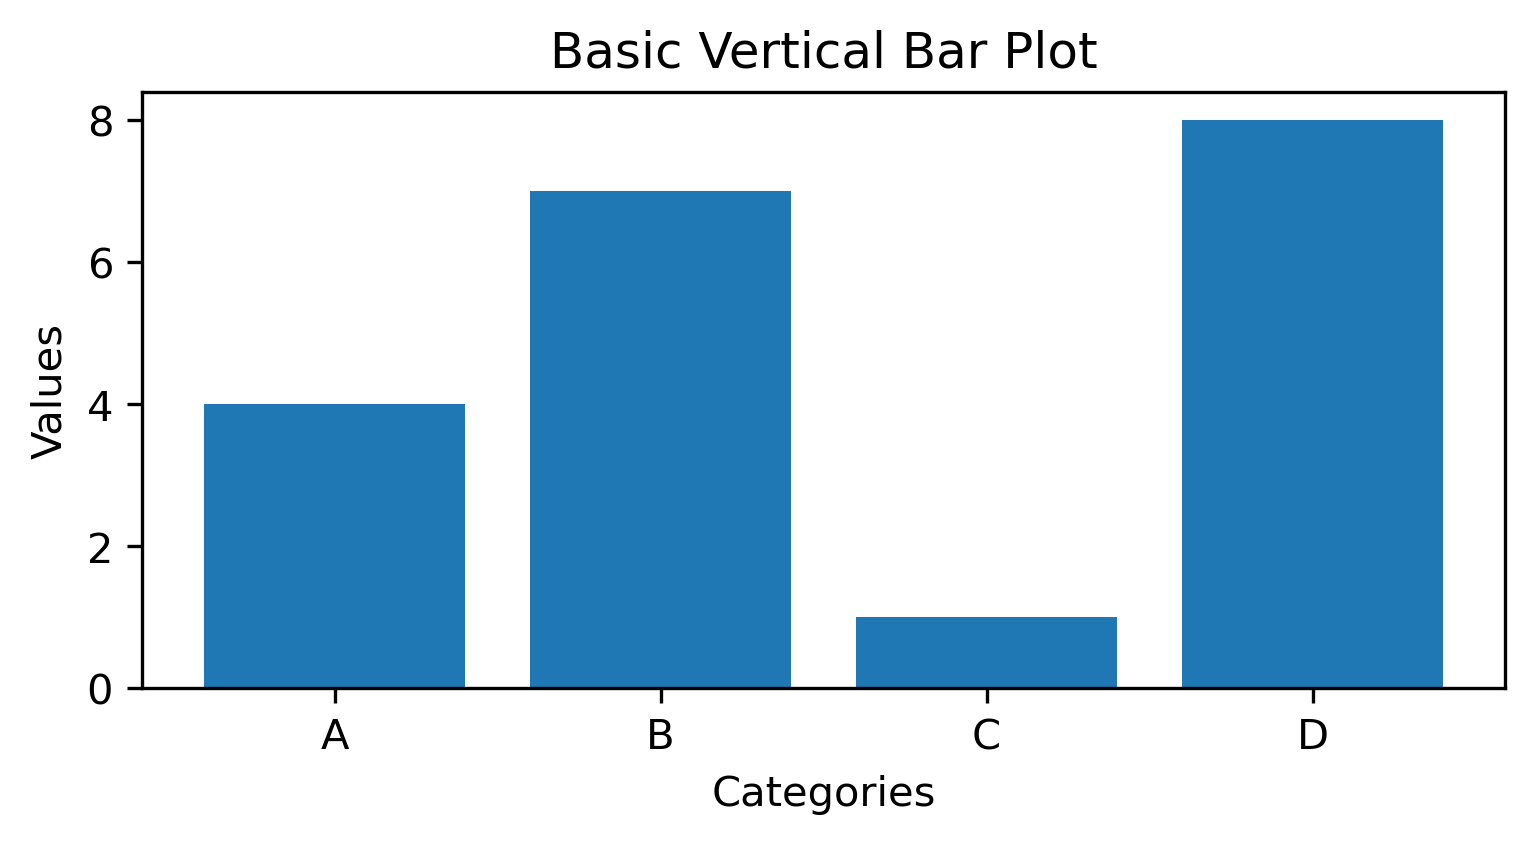

In [37]:
categories = ['A', 'B', 'C', 'D']
values = [4,7,1,8]

fig, ax = plt.subplots(figsize = (5,2.7), dpi = 300, layout = 'constrained')
ax.bar(categories, values)
ax.set_title("Basic Vertical Bar Plot")
ax.set_xlabel('Categories')
ax.set_ylabel('Values')

plt.show()

**To create a horizontal bar plot, use `barh()` instead of `bar()`**

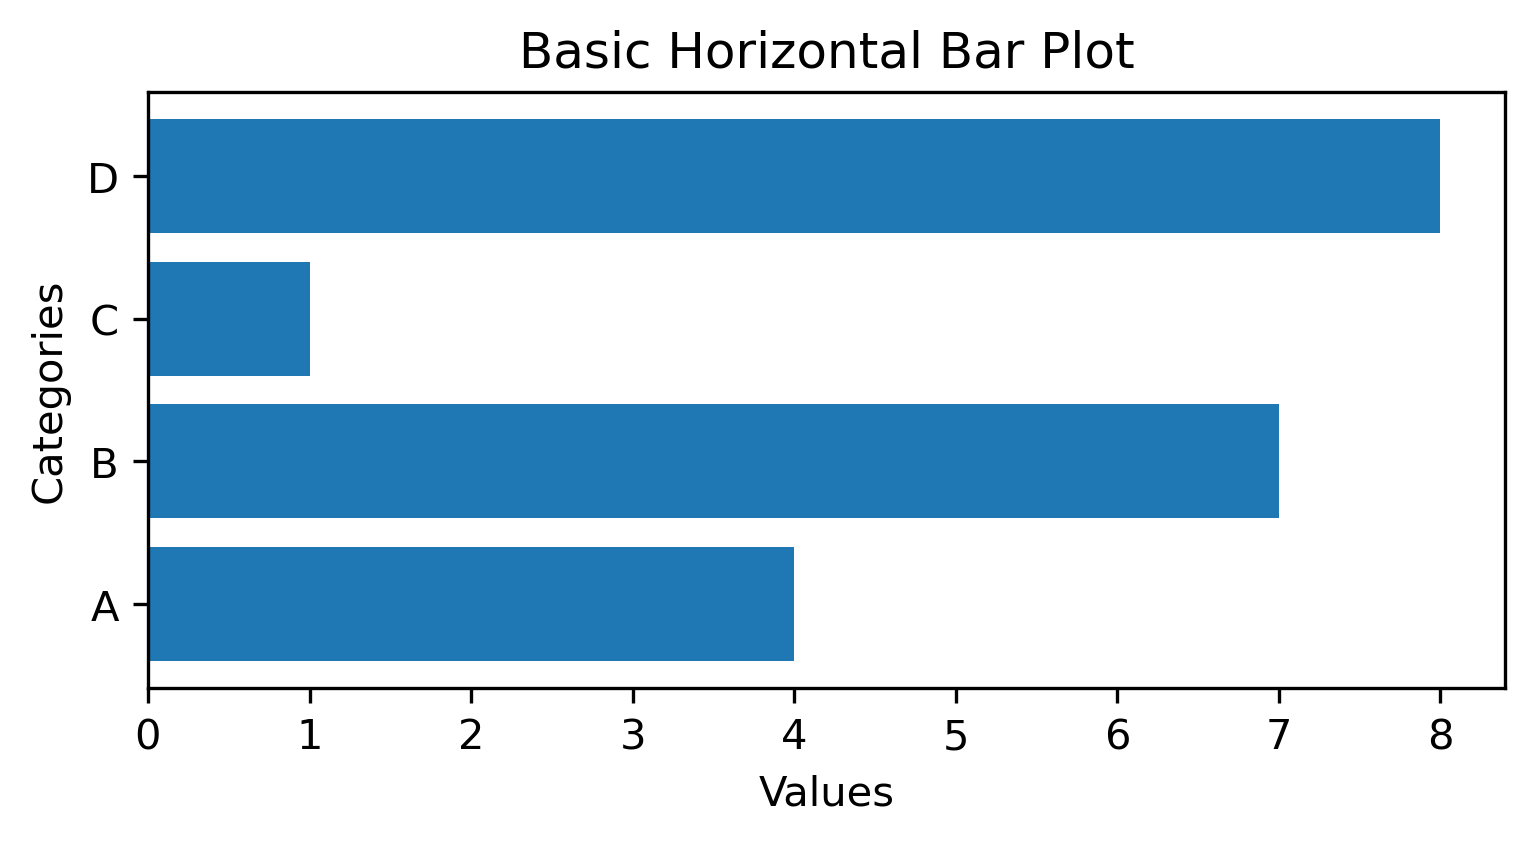

In [38]:
fig, ax = plt.subplots(figsize = (5, 2.7), dpi = 300, layout = 'constrained')

ax.barh(categories, values)
ax.set_title("Basic Horizontal Bar Plot")
ax.set_xlabel('Values')
ax.set_ylabel('Categories')

plt.show()

**Grouped Bar**  
Allows you to compare multiple groups side by side  

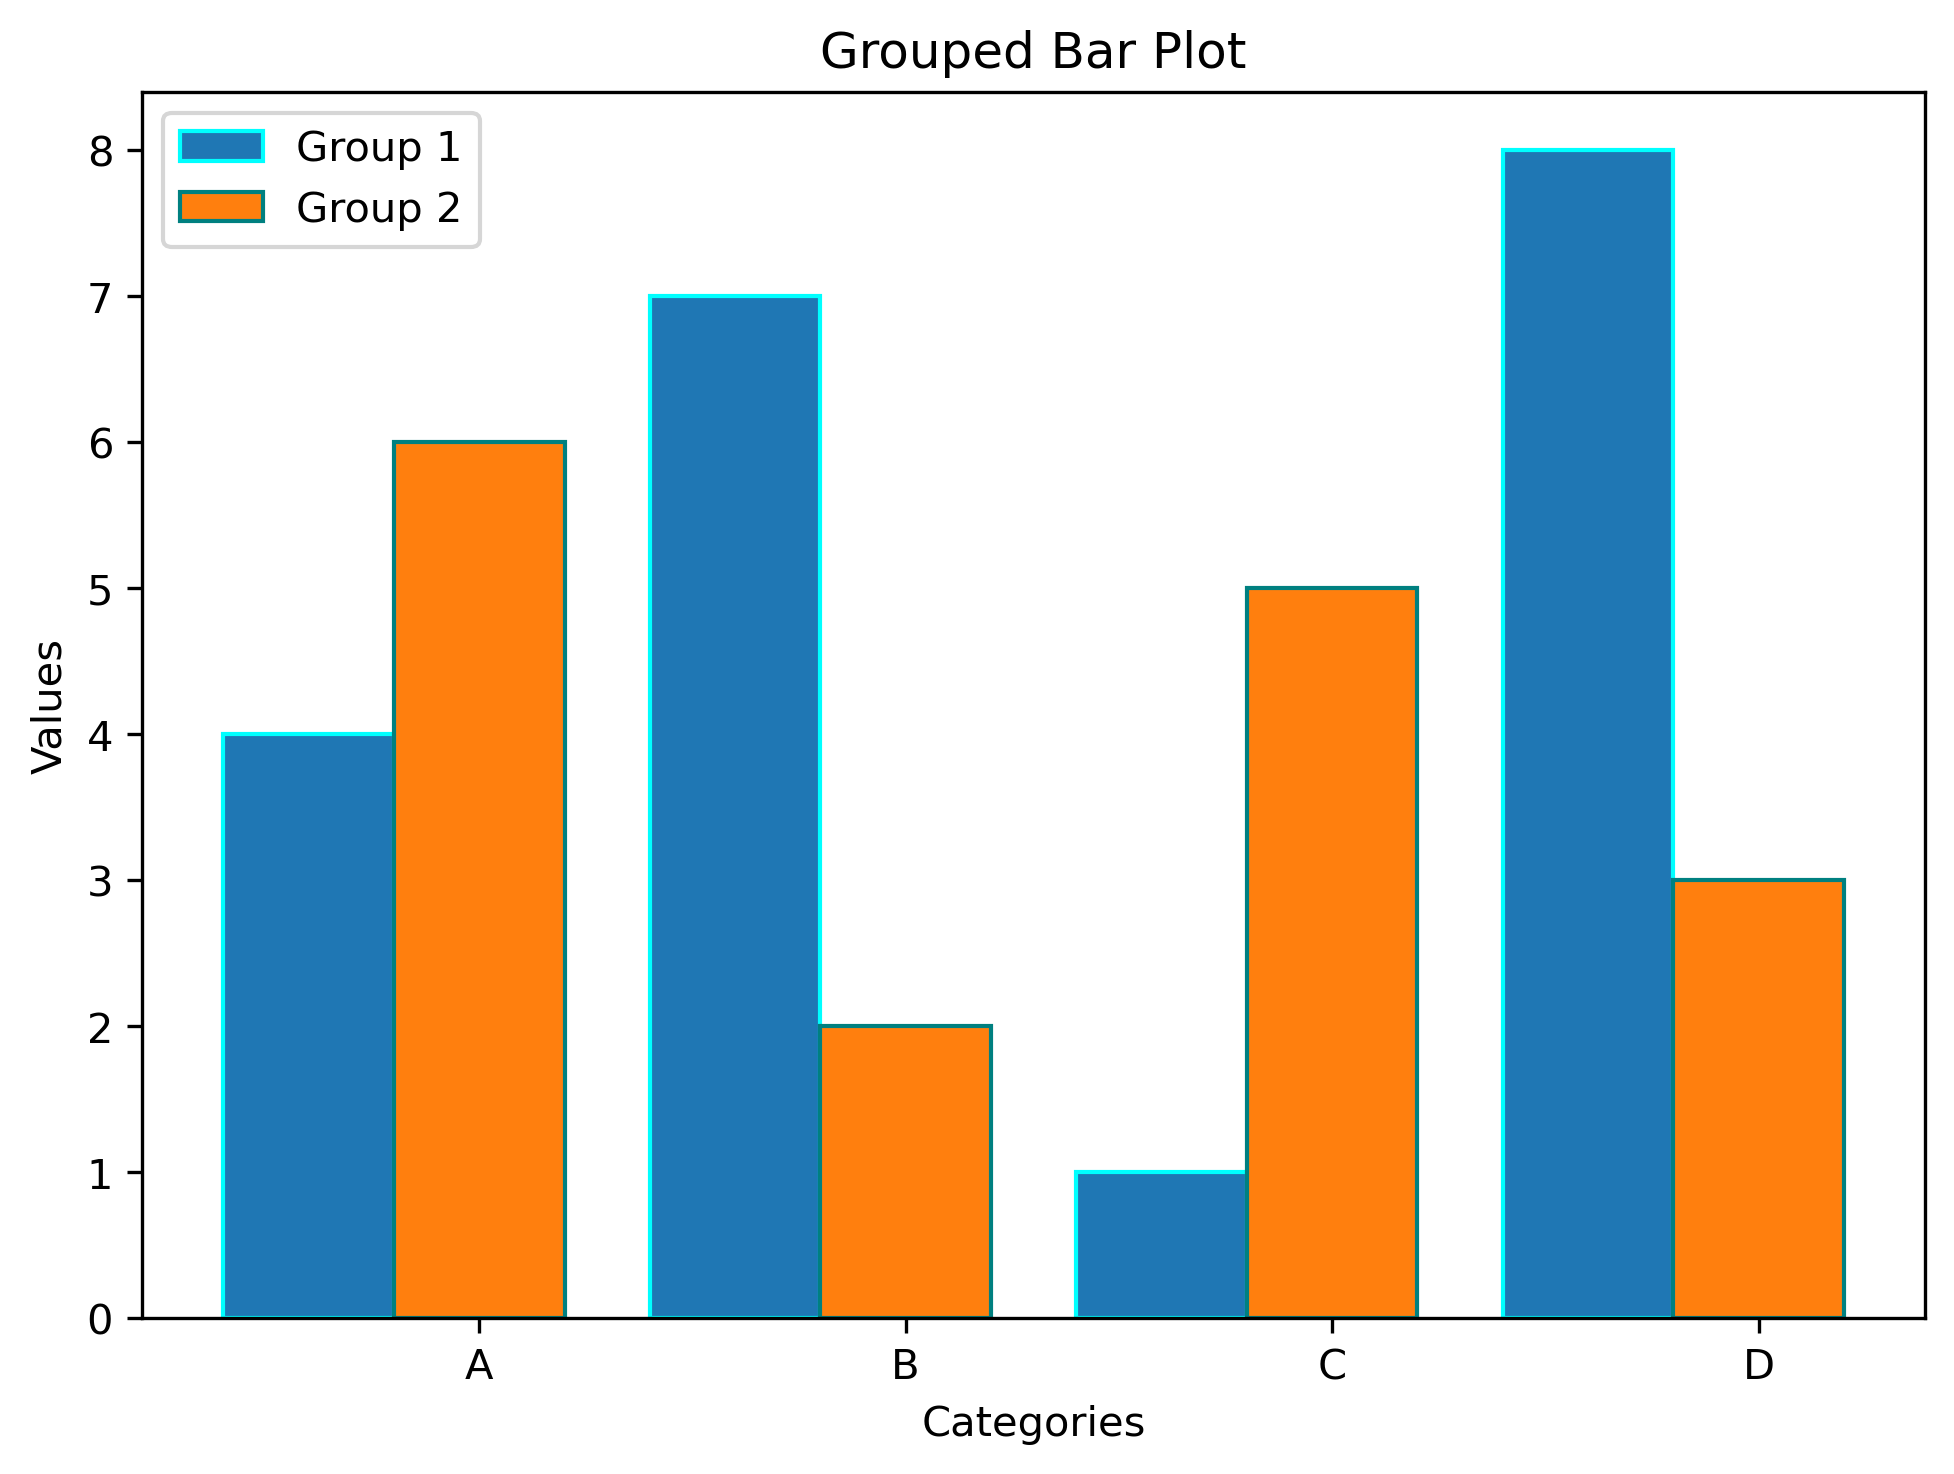

In [54]:
categories = ['A', 'B', 'C', 'D']
values1 = [4, 7, 1, 8]
values2 = [6, 2, 5, 3]

x = np.arange(len(categories))

fig, ax = plt.subplots( dpi = 300, layout = 'constrained')

ax.bar(x - 0.4, values1, width = 0.4, label = 'Group 1', edgecolor = 'cyan')
ax.bar(x  , values2, width = 0.4, label = 'Group 2', edgecolor = 'teal')

ax.set_title('Grouped Bar Plot')
ax.set_xticks(x, categories)
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.legend()

plt.show()

**Stacked Bar Plots**

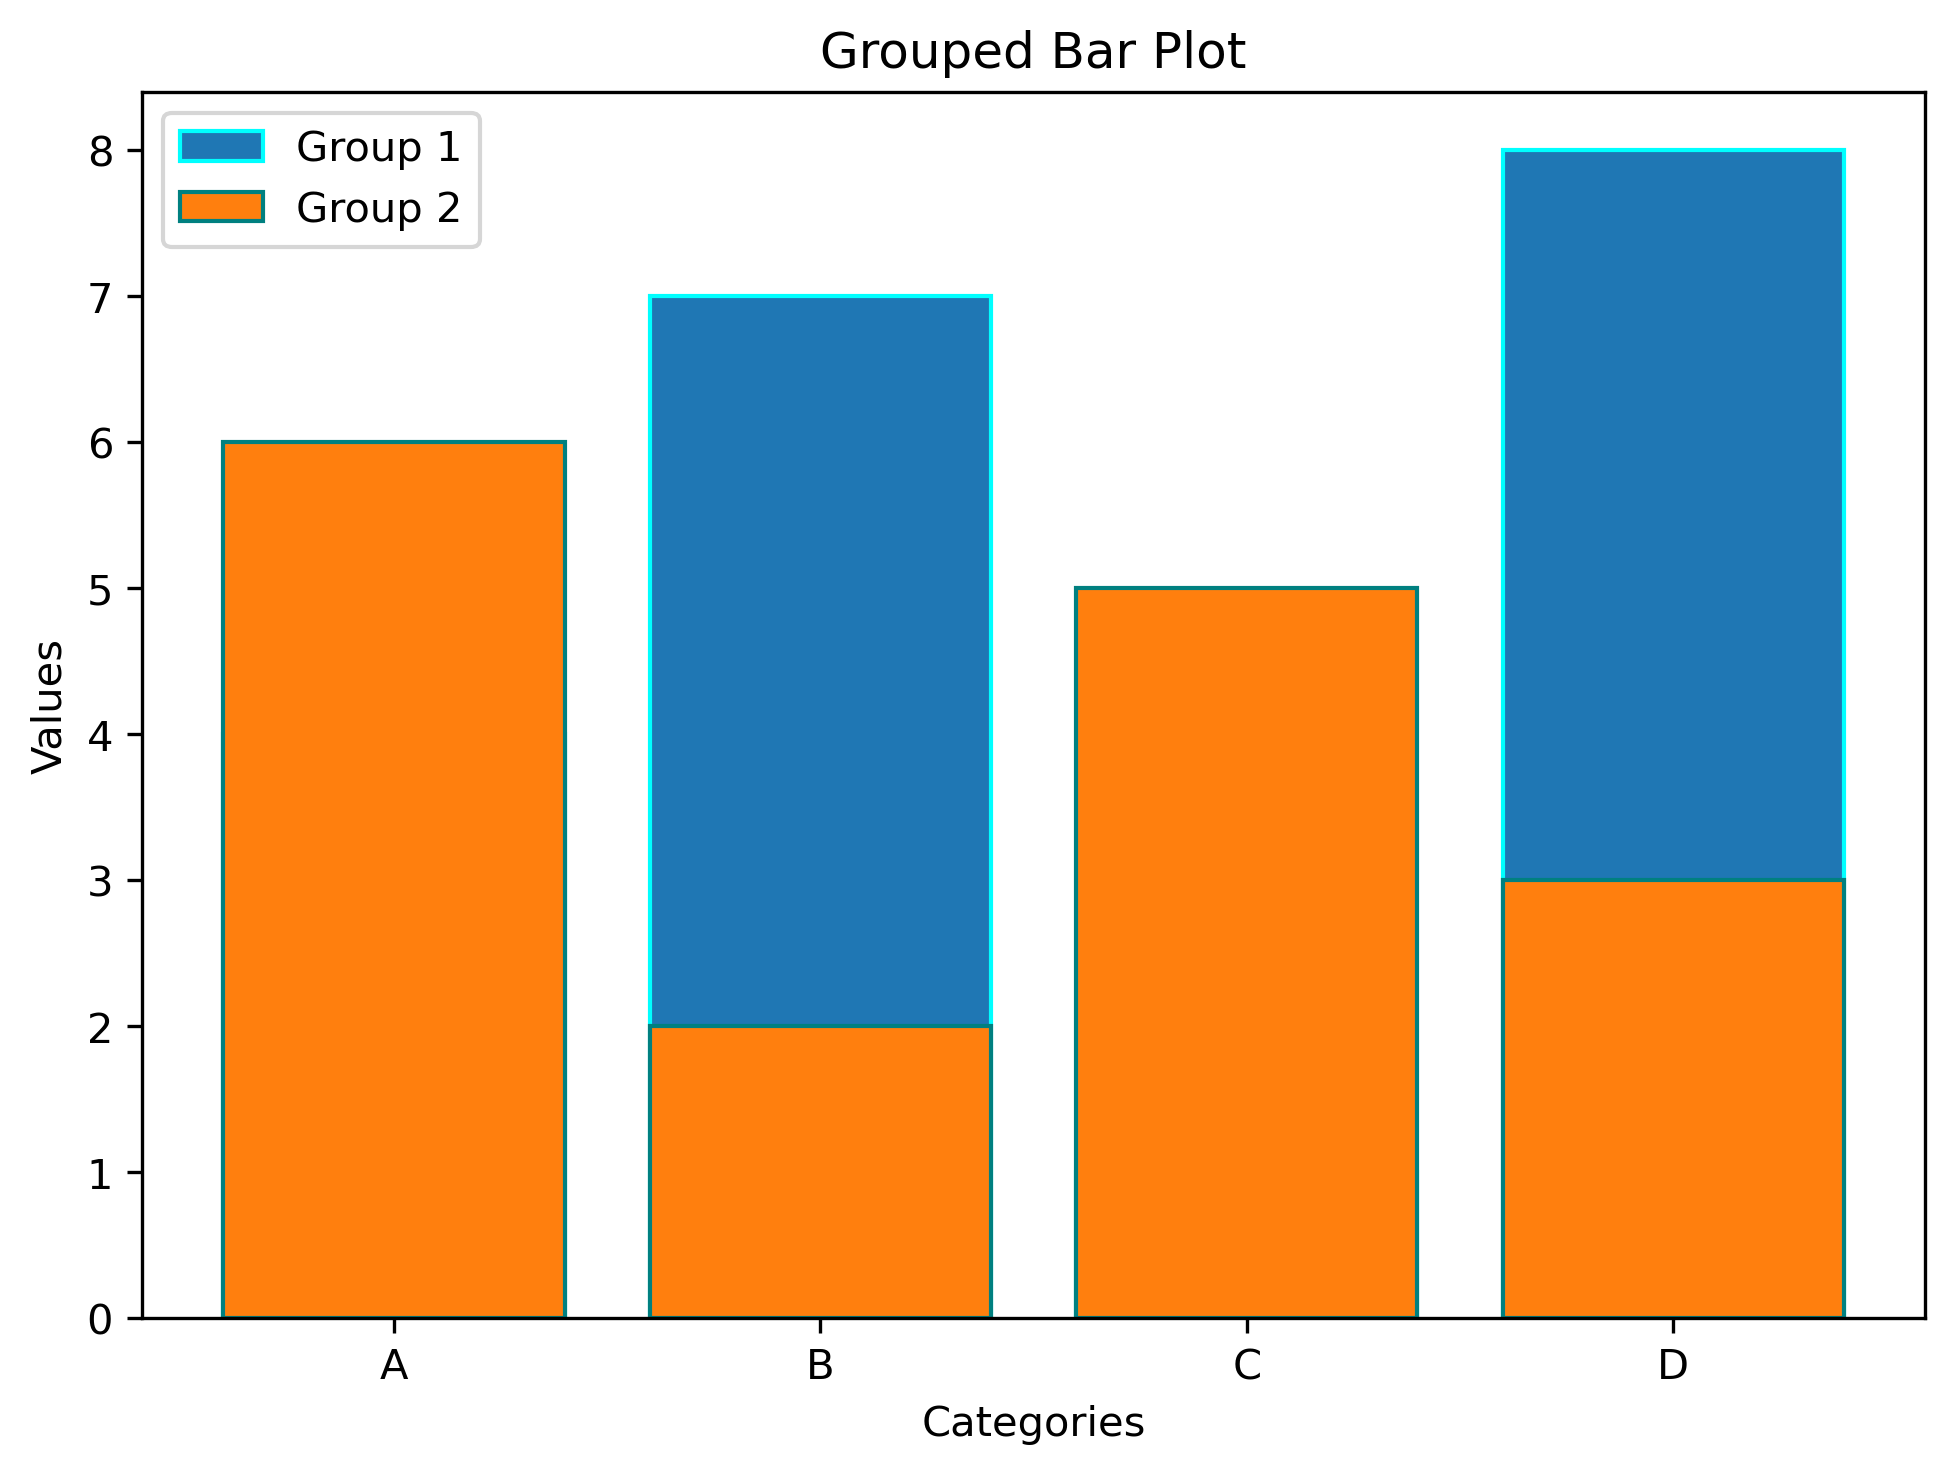

In [55]:
categories = ['A', 'B', 'C', 'D']
values1 = [4, 7, 1, 8]
values2 = [6, 2, 5, 3]

x = np.arange(len(categories))

fig, ax = plt.subplots( dpi = 300, layout = 'constrained')

ax.bar(x, values1, label = 'Group 1', edgecolor = 'cyan')
ax.bar(x  , values2, label = 'Group 2', edgecolor = 'teal')

ax.set_title('Grouped Bar Plot')
ax.set_xticks(x, categories)
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.legend()

plt.show()

**Histograms**  
Used to display the distribution of a dataset  

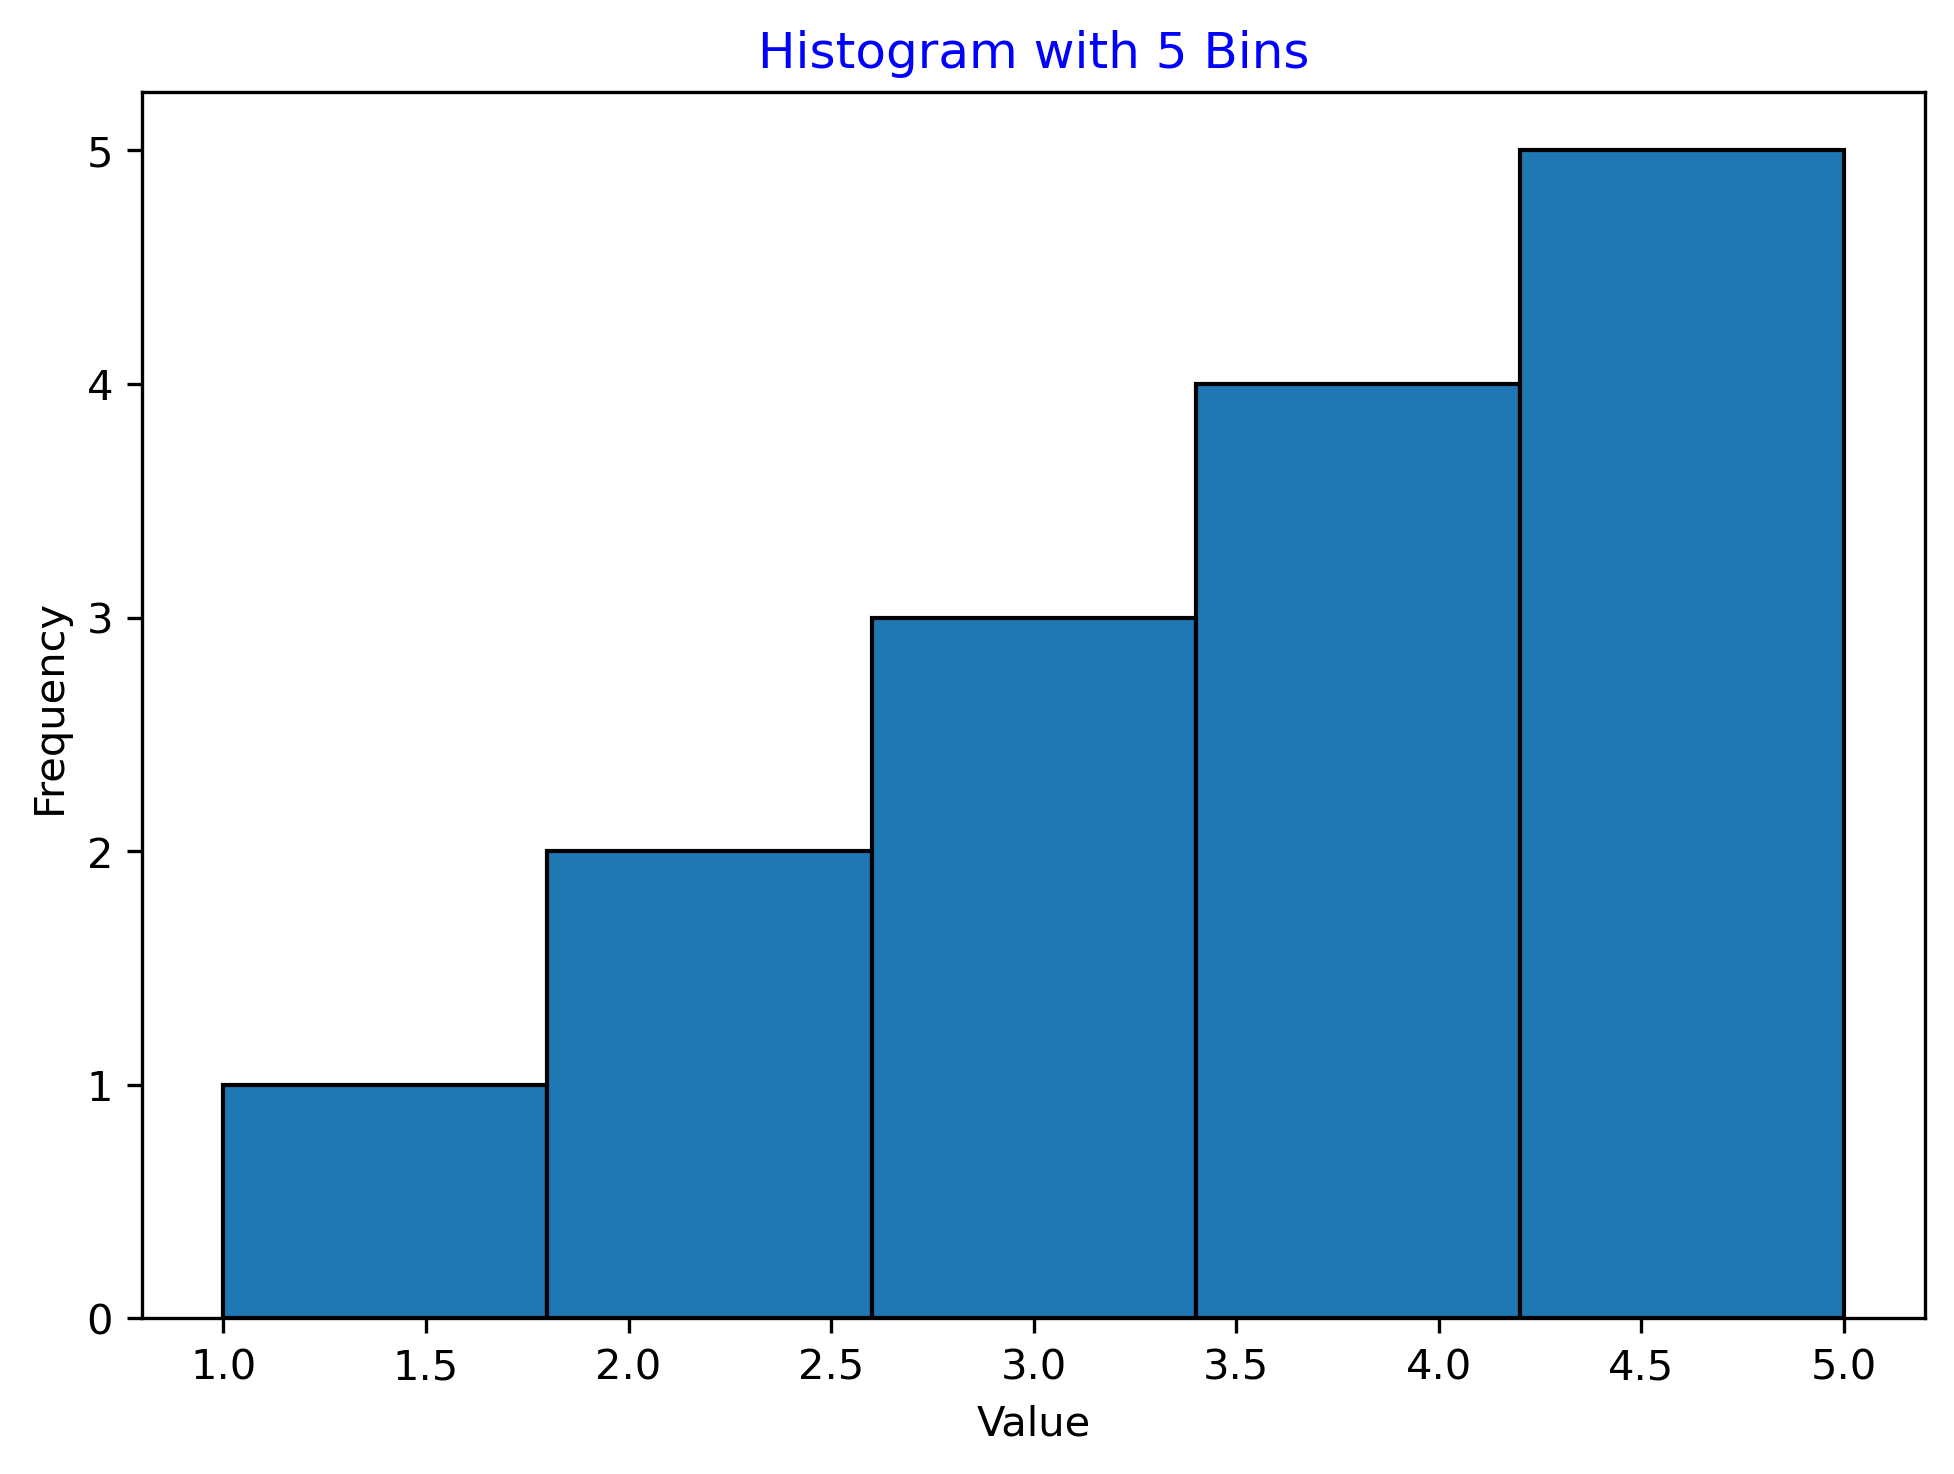

In [58]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

fig, ax = plt.subplots(dpi = 300, layout = 'constrained')

ax.hist(data, bins = 5, edgecolor = 'black')

ax.set_title('Histogram with 5 Bins', color = 'blue', fontsize = 12)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.show()

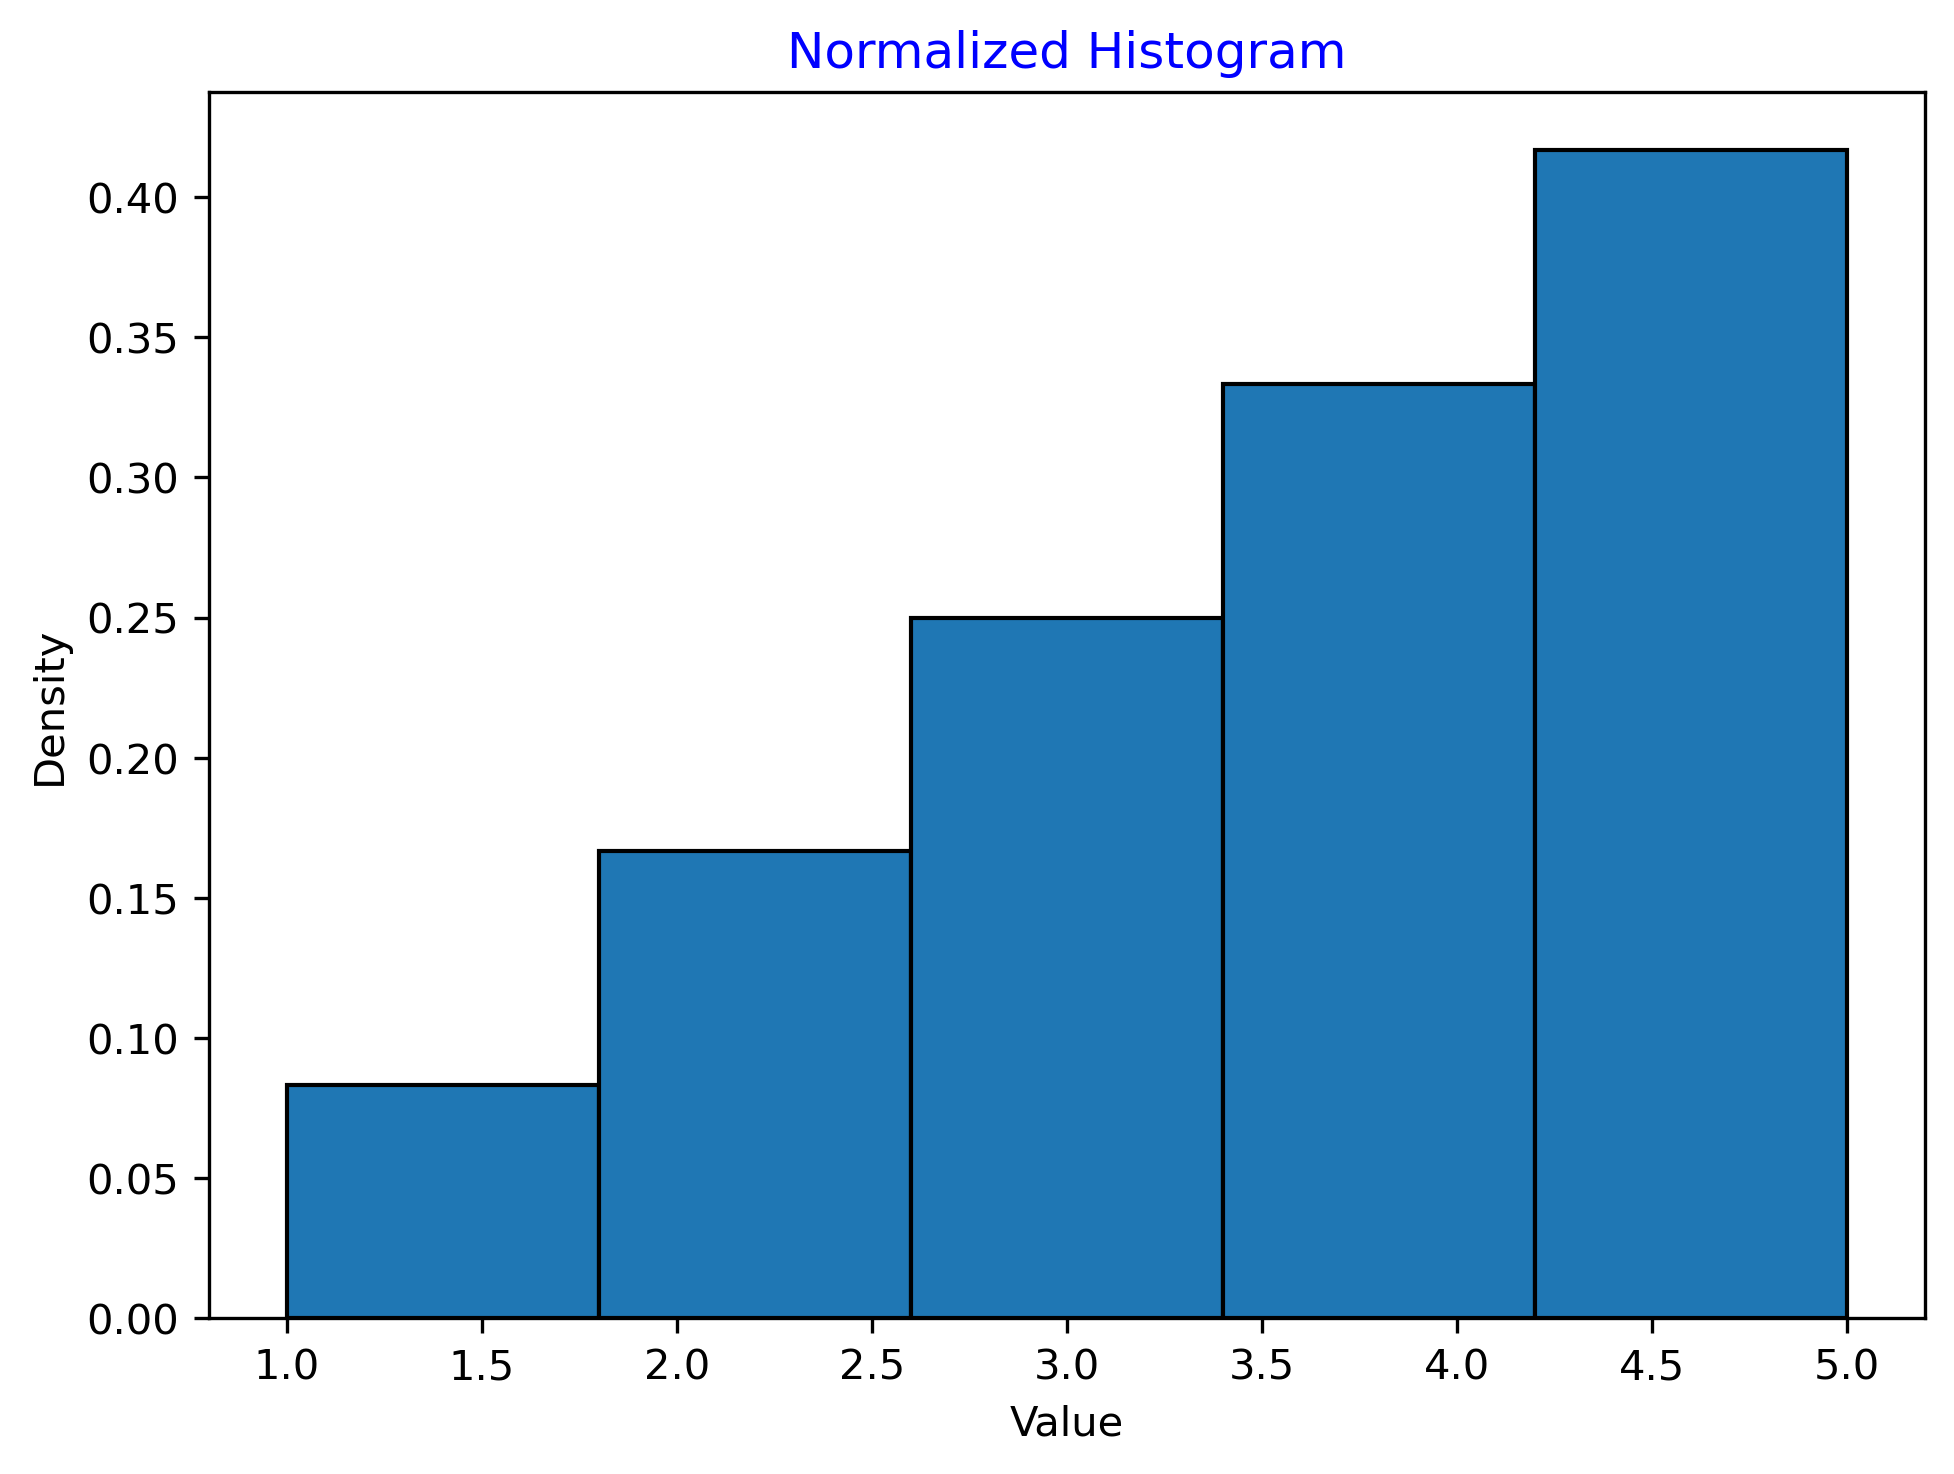

In [60]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

fig, ax = plt.subplots(dpi = 300, layout = 'constrained')

ax.hist(data, bins = 5, density = True,edgecolor = 'black')

ax.set_title('Normalized Histogram', color = 'blue', fontsize = 12)
ax.set_xlabel('Value')
ax.set_ylabel('Density')

plt.show()